In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
import plotly.express as px



import warnings
warnings.filterwarnings('ignore')


# Abstract

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

# Data source

This dataset has around 119390 rows and 32 columns

In [2]:
#reading data
df=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#checking for nullvalues
null=pd.DataFrame({'Null Values':df.isna().sum(),'Percentage of Null Values':((df.isna().sum())/(df.shape[0])*(100))})
null

,Null Values,Percentage of Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [6]:
#filling nullvalues with 0
df.fillna(0,inplace=True)

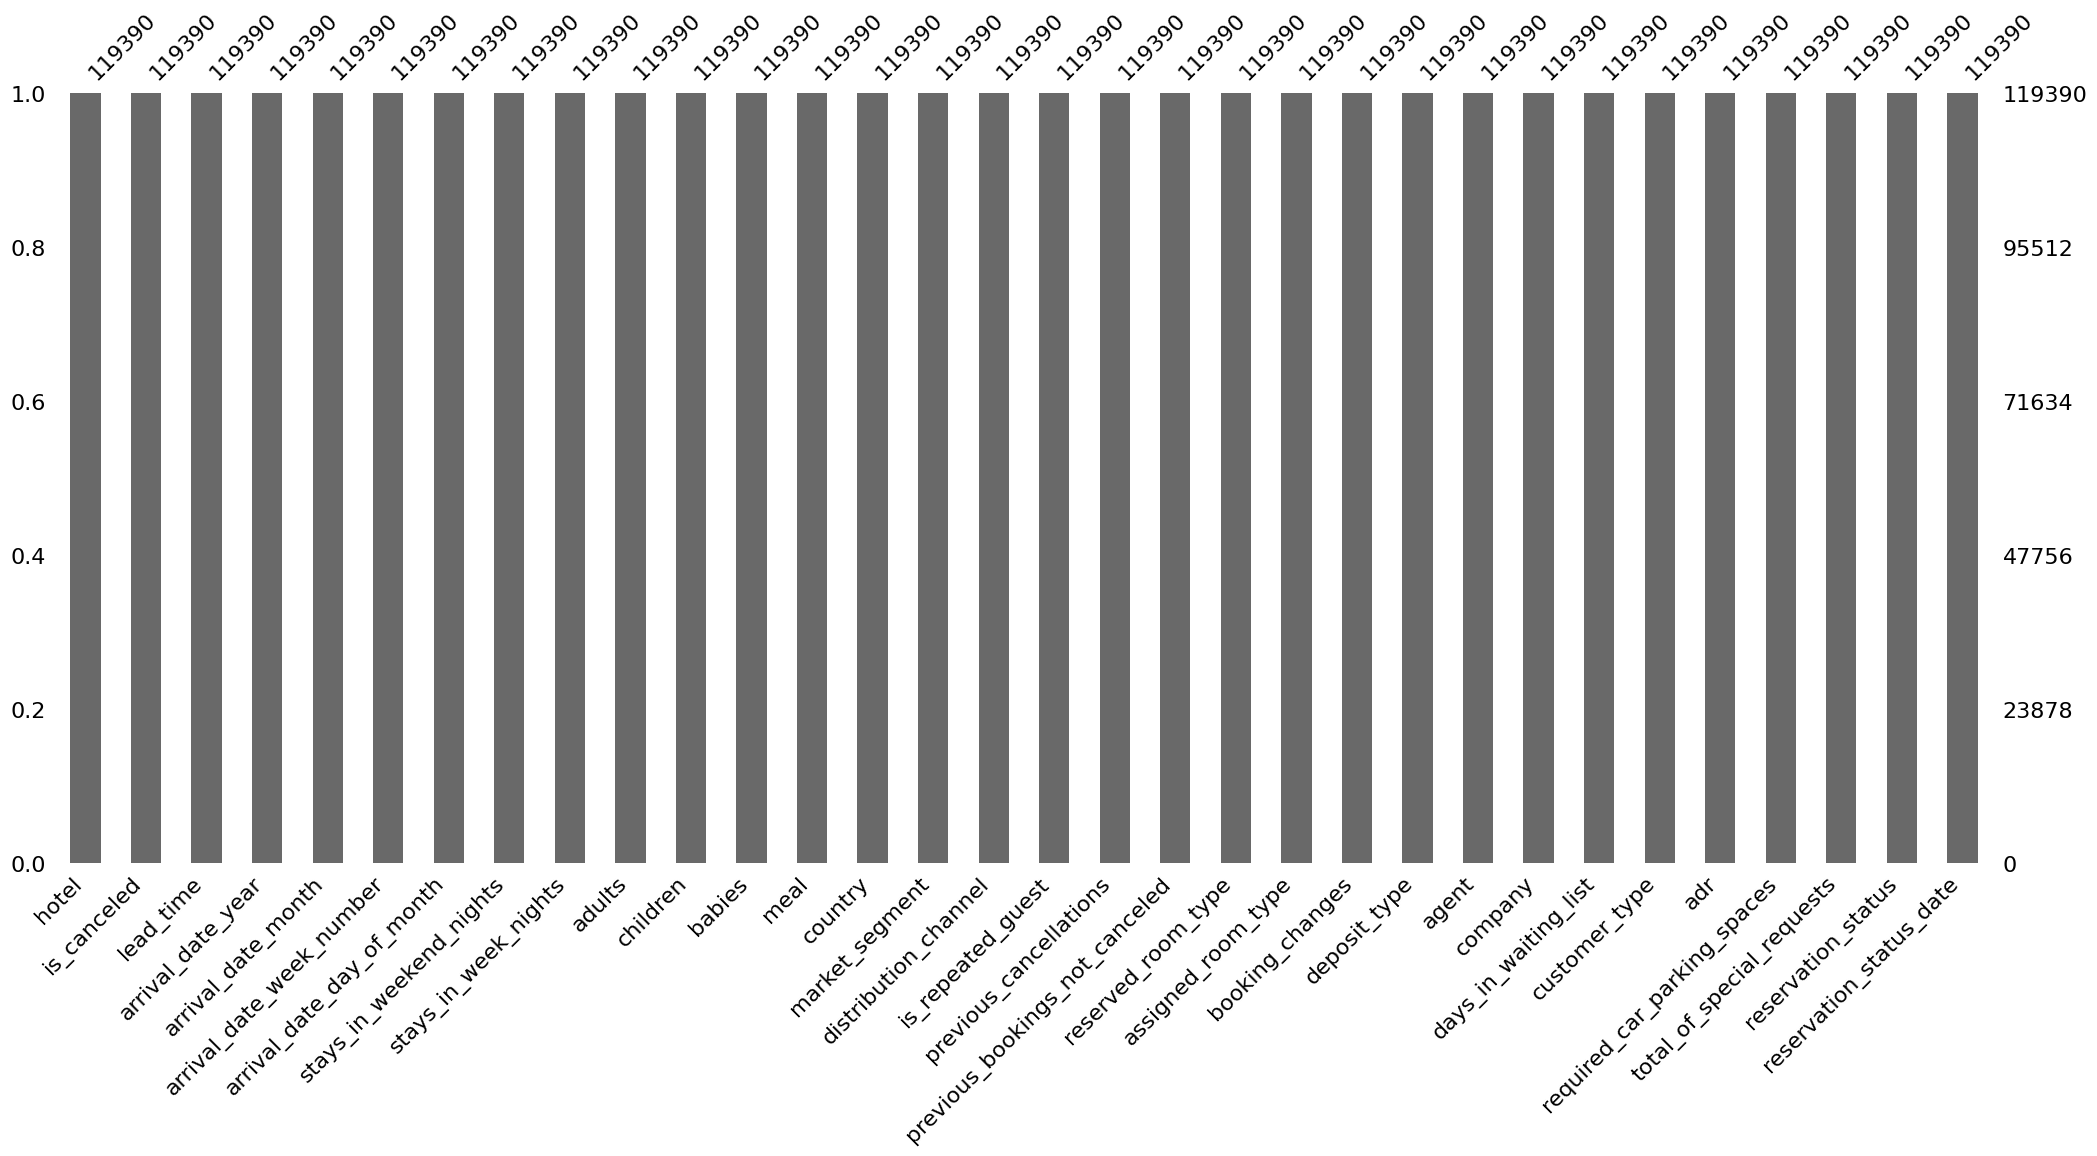

In [7]:
# visualizing null values
msno.bar(df)
plt.show()

In [8]:
#adult childern and babies can not all be zero at same time so droping rows where all 3 are zero
filter=(df.children ==0)&(df.babies ==0)&(df.adults ==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [9]:
df=df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# From where the most guests are coming?

In [10]:
Country_wise_guests=df[df['is_canceled']==0]['country'].value_counts().reset_index()
Country_wise_guests.columns=['country','no_of_guests']
Country_wise_guests

,country,no_of_guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [11]:
basemap=folium.Map()
guests_map=px.choropleth(Country_wise_guests,locations=Country_wise_guests['country'],
                         color=Country_wise_guests['no_of_guests'],hover_name=Country_wise_guests['country'])
guests_map.show()

**People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.**

# how much do guests pay for a room per night

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Both hotels have different room types and different meal arrangements.Seasonal factors are also important, So the prices varies a lot.**

In [13]:
data=df[df['is_canceled']==0]
px.box(data_frame=data,x='reserved_room_type',y='adr',color='hotel',template = 'plotly_dark')


**The figure shows that the average price per room depends on its type and the standard deviation.**

# How does the price vary per night over the year?

In [14]:
data_resort=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
data_city=df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]


In [15]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [16]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [17]:
final_hotel=resort_hotel.merge(city_hotel, on='arrival_date_month')
final_hotel.columns=['Month','Price_for_resort','Price_for_city_hotel']
final_hotel

,Month,Price_for_resort,Price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


**Now we observe here that month column is not in order, and if we visualize we will get improper conclusions.

So, first we have to provide right hierarchy to month column.

**

In [18]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays


  Preparing metadata (setup.py) ... - done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=8ad8142a1cab4b2766c43e79546501159f4dcdafc2868d0b08bbeeb06216bd34
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... - done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=523e2b5c1ce0244a01e2d1e55d8ae22e99d05e3d8662b0c7df4db9f8a98a0a35
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [19]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)


In [20]:
final_prices=sort_month(final_hotel,'Month')
final_prices

,Month,Price_for_resort,Price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [21]:
plt.figure(figsize=(17,8))
px.line(final_prices,x='Month',y=['Price_for_resort','Price_for_city_hotel'],
       title='Room price per night over the months')

<Figure size 1700x800 with 0 Axes>

**This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn .**

# Which are the most busy months?

In [22]:
resort_guests=data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['Month','no_of_guests']
resort_guests

,Month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [23]:
city_hotel_guests=data_city['arrival_date_month'].value_counts().reset_index()
city_hotel_guests.columns=['Month','no_of_guests']
city_hotel_guests

,Month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [24]:
final_guests=resort_guests.merge(city_hotel_guests,on='Month')
final_guests.columns=['Month','no_of_guests_in_resort','no_of_guests_in_city_hotel']
final_guests


,Month,no_of_guests_in_resort,no_of_guests_in_city_hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [25]:
final_guests=sort_month(final_guests,'Month')
final_guests

,Month,no_of_guests_in_resort,no_of_guests_in_city_hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [26]:
px.line(final_guests,x='Month',y=['no_of_guests_in_resort','no_of_guests_in_city_hotel'],
        title='Total no of guests per month',template='plotly_dark')


* The City hotel has more guests during In July and August .
* Guest numbers for the Resort hotel are lesss in June and September, Both hotels have the fewest guests during the November and December.

# How long do people stay at hotrls?

In [27]:
filter=df['is_canceled']==0
data=df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
data['total_nights']=data['stays_in_weekend_nights']+data['stays_in_week_nights']
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [29]:
stay=data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,:3]
stay=stay.rename(columns={'is_canceled':'no_of_stay'})
stay

,total_nights,hotel,no_of_stay
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [30]:
px.bar(stay,x='total_nights',y='no_of_stay',color='hotel',barmode='group',template='plotly_dark')

**Most of people stay in between 0-4 day**

In [31]:
#dropping columns that are not usefull
useless_column=['days_in_waiting_list','arrival_date_year','assigned_room_type',
                'booking_changes','reservation_status','country','days_in_waiting_list']
df.drop(useless_column,axis=1,inplace=True)

In [32]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,A,No Deposit,0.0,0.0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,No Deposit,304.0,0.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,Transient,98.0,0,1,2015-07-03
